In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import skimage.morphology as morp
from skimage.filters import rank
from sklearn.utils import shuffle
import csv
import os
import tensorflow as tf
import keras
from tensorflow.keras import Model
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.layers.convolutional import Conv2D # to add convolutional layers
from keras.layers.convolutional import MaxPooling2D, AveragePooling2D # to add pooling layers
from keras.layers import Flatten # to flatten data for fully connected layers
from keras.callbacks import ModelCheckpoint
from keras.utils import plot_model


from keras import models
from keras import layers
from keras import optimizers
from keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix

# is it using the GPU?
print(tf.test.gpu_device_name())

# Show current TensorFlow version
tf.__version__

'2.9.1'

In [2]:
training_file = "C:\\Users\\Roy\\traffic-signs-data\\train.p"
validation_file= "C:\\Users\\Roy\\traffic-signs-data\\valid.p"
testing_file = "C:\\Users\\Roy\\traffic-signs-data\\test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

In [3]:
signs = []
with open('signnames.csv', 'r') as csvfile:
    signnames = csv.reader(csvfile, delimiter=',')
    next(signnames,None)
    for row in signnames:
        signs.append(row[1])
    csvfile.close()

In [4]:
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# Number of training examples
n_train = X_train.shape[0]

# Number of testing examples
n_test = X_test.shape[0]

# Number of validation examples.
n_validation = X_valid.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples: ", n_train)
print("Number of testing examples: ", n_test)
print("Number of validation examples: ", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples:  34799
Number of testing examples:  12630
Number of validation examples:  4410
Image data shape = (32, 32, 3)
Number of classes = 43


In [5]:
def list_images(dataset, dataset_y, ylabel="", cmap=None):
    
    plt.figure(figsize=(15, 16))
    for i in range(6):
        plt.subplot(1, 6, i+1)
        indx = random.randint(0, len(dataset))
        #Use gray scale color map if there is only one channel
        cmap = 'gray' if len(dataset[indx].shape) == 2 else cmap
        plt.imshow(dataset[indx], cmap = cmap)
        plt.xlabel(signs[dataset_y[indx]])
        plt.ylabel(ylabel)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()

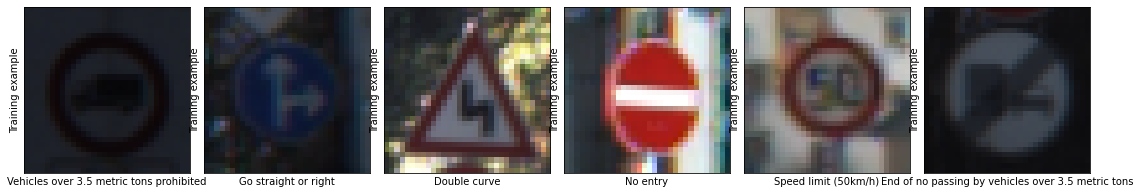

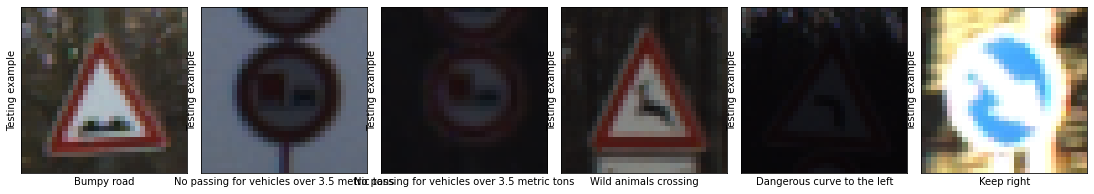

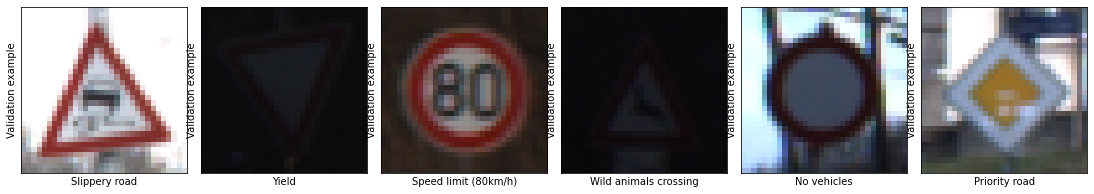

In [6]:
list_images(X_train, y_train, "Training example")
list_images(X_test, y_test, "Testing example")
list_images(X_valid, y_valid, "Validation example")

In [7]:
X_valid.shape

(4410, 32, 32, 3)

In [8]:
def histogram_plot(dataset, label):
    
    hist, bins = np.histogram(dataset, bins=n_classes)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, hist, align='center', width=width)
    plt.xlabel(label)
    plt.ylabel("Image count")
    plt.show()

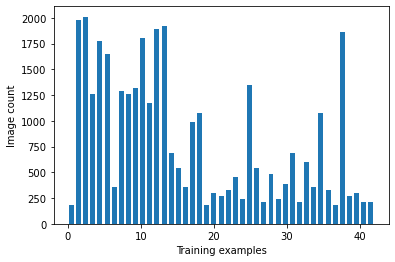

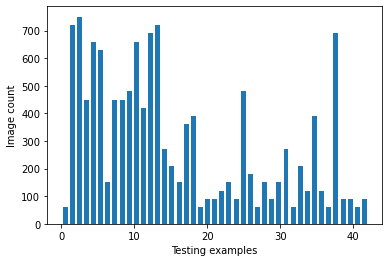

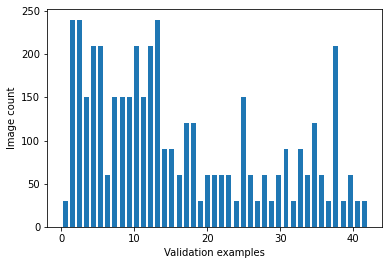

In [9]:
histogram_plot(y_train, "Training examples")
histogram_plot(y_test, "Testing examples")
histogram_plot(y_valid, "Validation examples")

In [10]:
X_train, y_train = shuffle(X_train, y_train)

In [11]:
def gray_scale(image):
   
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

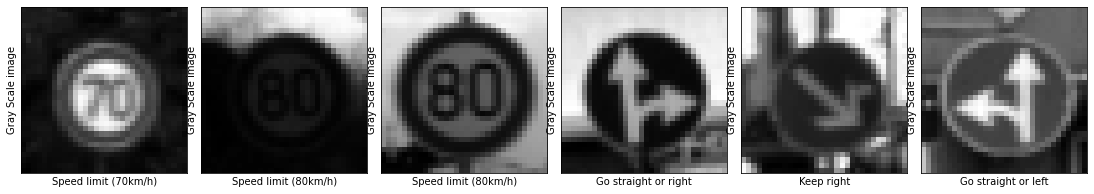

In [12]:
gray_images = list(map(gray_scale, X_train))
list_images(gray_images, y_train, "Gray Scale image", "gray")

In [13]:
def local_histo_equalize(image):
    
    kernel = morp.disk(30)
    img_local = rank.equalize(image, selem=kernel)
    return img_local

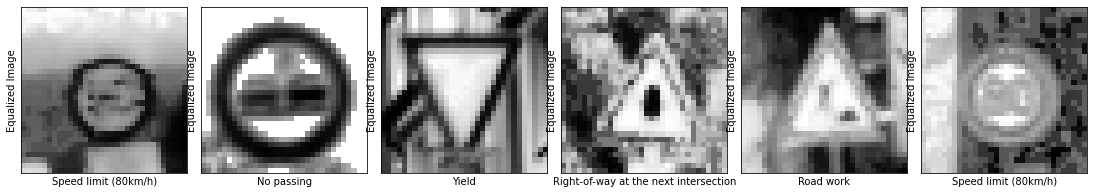

In [14]:
equalized_images = list(map(local_histo_equalize, gray_images))
list_images(equalized_images, y_train, "Equalized Image", "gray")

In [15]:
def image_normalize(image):
    
    image = np.divide(image, 255)
    return image

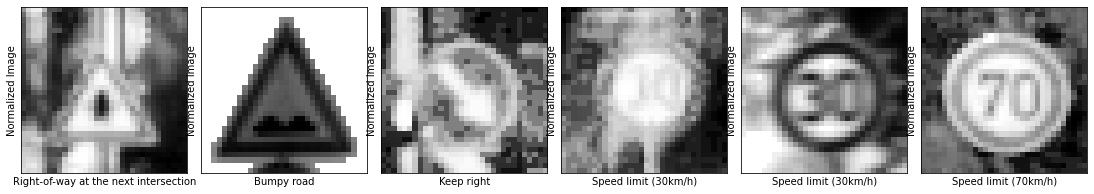

In [16]:
n_training = X_train.shape
normalized_images = np.zeros((n_training[0], n_training[1], n_training[2]))
for i, img in enumerate(equalized_images):
    normalized_images[i] = image_normalize(img)
list_images(normalized_images, y_train, "Normalized Image", "gray")
normalized_images = normalized_images[..., None]

In [17]:
def preprocess(data):
    
    gray_images = list(map(gray_scale, data))
    equalized_images = list(map(local_histo_equalize, gray_images))
    n_training = data.shape
    normalized_images = np.zeros((n_training[0], n_training[1], n_training[2]))
    for i, img in enumerate(equalized_images):
        normalized_images[i] = image_normalize(img)
    normalized_images = normalized_images[..., None]
    return normalized_images

In [18]:
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)


In [19]:
from keras.applications import ResNet50
conv_base =ResNet50(input_shape=(32,32,3), weights='imagenet', include_top=False)

In [20]:
train_features = conv_base.predict(X_train)
test_features = conv_base.predict(X_test)
valid_features = conv_base.predict(X_valid)

138/138 [==============================] - 23s 166ms/step


In [21]:
train_features.shape

(34799, 1, 1, 2048)

In [ ]:
dense_model.add(Dropout(0.3))

In [28]:
dense_model = models.Sequential()
dense_model.add(layers.Flatten(input_shape = (32, 32, 3)))
dense_model.add(layers.Dense(units = 552, activation = "relu"))

dense_model.add(layers.Dense(units = 256, activation = "relu"))

dense_model.add(layers.Dense(units = 128, activation = "relu"))

dense_model.add(layers.Dense(units = 80, activation = "relu"))
dense_model.add(layers.Dense(units = 64, activation = "relu"))

dense_model.add(layers.Dense(units = 43, activation = "softmax"))

initial_weights = dense_model.get_weights()
dense_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_18 (Dense)            (None, 552)               1696296   
                                                                 
 dense_19 (Dense)            (None, 256)               141568    
                                                                 
 dense_20 (Dense)            (None, 128)               32896     
                                                                 
 dense_21 (Dense)            (None, 80)                10320     
                                                                 
 dense_22 (Dense)            (None, 64)                5184      
                                                                 
 dense_23 (Dense)            (None, 43)               

In [29]:
dense_model.set_weights(initial_weights) # restore the initial weights in order to start the training from the beginning on every run of the cell
optimizer_use = optimizers.Adam(lr=0.0001)
dense_model.compile(optimizer = optimizer_use, loss = "categorical_crossentropy", metrics = ["categorical_accuracy"])
callbacks_list = [EarlyStopping(monitor = 'val_loss', patience = 4, restore_best_weights = True)]
history = dense_model.fit(X_train, y_train, epochs = 20, batch_size = 32, validation_data = (X_valid, y_valid))

Epoch 1/20
1088/1088 [==============================] - 22s 20ms/step - loss: 3.6796 - categorical_accuracy: 0.2905 - val_loss: 2.7518 - val_categorical_accuracy: 0.3780
Epoch 2/20
1088/1088 [==============================] - 21s 19ms/step - loss: 1.7114 - categorical_accuracy: 0.5577 - val_loss: 1.7270 - val_categorical_accuracy: 0.5519
Epoch 3/20
1088/1088 [==============================] - 21s 19ms/step - loss: 1.1482 - categorical_accuracy: 0.6925 - val_loss: 1.8428 - val_categorical_accuracy: 0.5637
Epoch 4/20
1088/1088 [==============================] - 20s 19ms/step - loss: 0.9027 - categorical_accuracy: 0.7569 - val_loss: 1.4898 - val_categorical_accuracy: 0.6478
Epoch 5/20
1088/1088 [==============================] - 21s 19ms/step - loss: 0.7431 - categorical_accuracy: 0.7998 - val_loss: 1.3535 - val_categorical_accuracy: 0.6993
Epoch 6/20
1088/1088 [==============================] - 21s 19ms/step - loss: 0.6396 - categorical_accuracy: 0.8262 - val_loss: 1.5929 - val_categoric

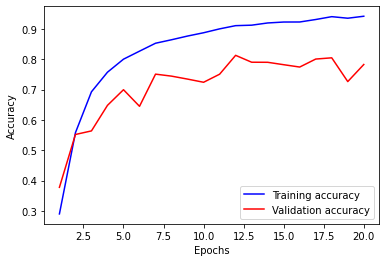

In [30]:
acc_values = history.history['categorical_accuracy']
val_acc_values = history.history['val_categorical_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'b', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label = 'Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
from keras.applications import ResNet50V2
conv_base_2 =ResNet50V2(input_shape=(32,32,3), weights='imagenet', include_top=False)

94668760/94668760 [==============================] - 61s 1us/step


In [28]:
conv_base_2.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 18, 18, 64)   0           ['conv1_conv[0][0]']             
                                                                                         

                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 8, 8, 64)     16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 8, 8, 64)    256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 8, 8, 64)    0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_blo

 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 4, 4, 128)   0           ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 4, 4, 512)    66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_block2_out (Add)         (None, 4, 4, 512)    0           ['conv3_block1_out[0][0]',       
                                                                  'conv3_block2_3_conv[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block1_1_bn (BatchNormal  (None, 2, 2, 256)   1024        ['conv4_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, 2, 2, 256)   0           ['conv4_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block1_2_pad (ZeroPaddin  (None, 4, 4, 256)   0           ['conv4_block1_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_block1_2_conv (Conv2D)   (None, 2, 2, 256)    589824      ['conv4_block1_2_pad[0][0]']     
          

                                                                                                  
 conv4_block3_out (Add)         (None, 2, 2, 1024)   0           ['conv4_block2_out[0][0]',       
                                                                  'conv4_block3_3_conv[0][0]']    
                                                                                                  
 conv4_block4_preact_bn (BatchN  (None, 2, 2, 1024)  4096        ['conv4_block3_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv4_block4_preact_relu (Acti  (None, 2, 2, 1024)  0           ['conv4_block4_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block6_2_conv (Conv2D)   (None, 1, 1, 256)    589824      ['conv4_block6_2_pad[0][0]']     
                                                                                                  
 conv4_block6_2_bn (BatchNormal  (None, 1, 1, 256)   1024        ['conv4_block6_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block6_2_relu (Activatio  (None, 1, 1, 256)   0           ['conv4_block6_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 1, 1, 1024)  0           ['conv4_block5_out[0][0]']       
          

                                                                                                  
 conv5_block3_preact_relu (Acti  (None, 1, 1, 2048)  0           ['conv5_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv5_block3_1_conv (Conv2D)   (None, 1, 1, 512)    1048576     ['conv5_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv5_block3_1_bn (BatchNormal  (None, 1, 1, 512)   2048        ['conv5_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_blo

In [29]:
dense_model_2 = models.Sequential()
dense_model_2.add(layers.Flatten(input_shape = (32, 32, 3)))

dense_model_2.add(layers.Dense(units = 128, activation = "relu"))
dense_model_2.add(layers.Dense(units = 120, activation = "relu"))
dense_model_2.add(layers.Dense(units = 98, activation = "relu"))



dense_model_2.add(layers.Dense(units = 80, activation = "relu"))

dense_model_2.add(layers.Dense(units = 43, activation = "softmax"))

initial_weights_2 = dense_model_2.get_weights()
dense_model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_17 (Dense)            (None, 128)               393344    
                                                                 
 dense_18 (Dense)            (None, 120)               15480     
                                                                 
 dense_19 (Dense)            (None, 98)                11858     
                                                                 
 dense_20 (Dense)            (None, 80)                7920      
                                                                 
 dense_21 (Dense)            (None, 43)                3483      
                                                                 
Total params: 432,085
Trainable params: 432,085
Non-tr

In [31]:
dense_model_2.set_weights(initial_weights_2) # restore the initial weights in order to start the training from the beginning on every run of the cell
optimizer_use = optimizers.RMSprop(lr=0.0001)
dense_model_2.compile(optimizer = optimizer_use, loss = "categorical_crossentropy", metrics = ["categorical_accuracy"])
callbacks_list = [EarlyStopping(monitor = 'val_loss', patience = 4, restore_best_weights = True)]
history = dense_model_2.fit(X_train, y_train, epochs = 25, batch_size = 32, validation_data = (X_valid, y_valid))

Epoch 1/25


C:\Users\Roy\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


1088/1088 [==============================] - 15s 13ms/step - loss: 4.0834 - categorical_accuracy: 0.1446 - val_loss: 3.5443 - val_categorical_accuracy: 0.2000
Epoch 2/25
1088/1088 [==============================] - 18s 17ms/step - loss: 2.3922 - categorical_accuracy: 0.3281 - val_loss: 2.2911 - val_categorical_accuracy: 0.3825
Epoch 3/25
1088/1088 [==============================] - 18s 17ms/step - loss: 1.7263 - categorical_accuracy: 0.4902 - val_loss: 1.8054 - val_categorical_accuracy: 0.5195
Epoch 4/25
1088/1088 [==============================] - 16s 15ms/step - loss: 1.3945 - categorical_accuracy: 0.5892 - val_loss: 1.7255 - val_categorical_accuracy: 0.5556
Epoch 5/25
1088/1088 [==============================] - 18s 17ms/step - loss: 1.1723 - categorical_accuracy: 0.6575 - val_loss: 1.4739 - val_categorical_accuracy: 0.5986
Epoch 6/25
1088/1088 [==============================] - 18s 17ms/step - loss: 1.0185 - categorical_accuracy: 0.7076 - val_loss: 1.5267 - val_categorical_accuracy

In [34]:
from keras.applications import VGG19
conv_base_3 =VGG19(input_shape=(32,32,3), weights='imagenet', include_top=False)

conv_base_3.summary()

In [35]:
conv_base_3.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [36]:
dense_model_3 = models.Sequential()
dense_model_3.add(layers.Flatten(input_shape = (32, 32, 3)))

dense_model_3.add(layers.Dense(units = 128, activation = "relu"))
dense_model_3.add(layers.Dense(units = 120, activation = "relu"))
dense_model_3.add(layers.Dense(units = 98, activation = "relu"))



dense_model_3.add(layers.Dense(units = 80, activation = "relu"))

dense_model_3.add(layers.Dense(units = 43, activation = "softmax"))

initial_weights_3 = dense_model_3.get_weights()
dense_model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 dense_22 (Dense)            (None, 128)               393344    
                                                                 
 dense_23 (Dense)            (None, 120)               15480     
                                                                 
 dense_24 (Dense)            (None, 98)                11858     
                                                                 
 dense_25 (Dense)            (None, 80)                7920      
                                                                 
 dense_26 (Dense)            (None, 43)                3483      
                                                                 
Total params: 432,085
Trainable params: 432,085
Non-tr

In [37]:
dense_model_3.set_weights(initial_weights_3) # restore the initial weights in order to start the training from the beginning on every run of the cell
optimizer_use = optimizers.RMSprop(lr=0.0001)
dense_model_3.compile(optimizer = optimizer_use, loss = "categorical_crossentropy", metrics = ["categorical_accuracy"])
callbacks_list = [EarlyStopping(monitor = 'val_loss', patience = 4, restore_best_weights = True)]
history = dense_model_3.fit(X_train, y_train, epochs = 25, batch_size = 32, validation_data = (X_valid, y_valid))

Epoch 1/25
1088/1088 [==============================] - 15s 13ms/step - loss: 4.1074 - categorical_accuracy: 0.2244 - val_loss: 3.4287 - val_categorical_accuracy: 0.2680
Epoch 2/25
1088/1088 [==============================] - 14s 13ms/step - loss: 1.9691 - categorical_accuracy: 0.4914 - val_loss: 2.0991 - val_categorical_accuracy: 0.4864
Epoch 3/25
1088/1088 [==============================] - 14s 13ms/step - loss: 1.4000 - categorical_accuracy: 0.6234 - val_loss: 1.7834 - val_categorical_accuracy: 0.5662
Epoch 4/25
1088/1088 [==============================] - 13s 12ms/step - loss: 1.1044 - categorical_accuracy: 0.6996 - val_loss: 1.6556 - val_categorical_accuracy: 0.5952
Epoch 5/25
1088/1088 [==============================] - 13s 12ms/step - loss: 0.9273 - categorical_accuracy: 0.7484 - val_loss: 1.7321 - val_categorical_accuracy: 0.6156
Epoch 6/25
1088/1088 [==============================] - 15s 14ms/step - loss: 0.8166 - categorical_accuracy: 0.7777 - val_loss: 1.3433 - val_categoric

In [39]:
from keras.applications import MobileNetV2
conv_base_4 =MobileNetV2(input_shape=(32,32,3), weights='imagenet', include_top=False)

In [40]:
conv_base_4.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 16, 16, 32)   864         ['input_7[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 16, 16, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 16, 16, 32)   0           ['bn_Conv1[0][0]']               
                                                                               

                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 4, 4, 144)   576         ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 4, 4, 144)    0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 4, 4, 32)     4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 4, 4, 32)    128         ['block_3_project[0][0]']        
 lization)                                                                                        
          

                                                                                                  
 block_7_expand_relu (ReLU)     (None, 2, 2, 384)    0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 2, 2, 384)   3456        ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 2, 2, 384)   1536        ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_depthwise_relu (ReLU)  (None, 2, 2, 384)    0           ['block_7_depthwise_BN[0][0]']   
          

 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 2, 2, 576)    55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 2, 2, 576)   2304        ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 2, 2, 576)    0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_depthwise (DepthwiseC  (None, 2, 2, 576)   5184        ['block_11_expand_relu[0][0]']   
 onv2D)   

 block_14_depthwise_relu (ReLU)  (None, 1, 1, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 1, 1, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 1, 1, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 1, 1, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
                                                                                                  
 block_15_

In [41]:
dense_model_4 = models.Sequential()
dense_model_4.add(layers.Flatten(input_shape = (32, 32, 3)))

dense_model_4.add(layers.Dense(units = 128, activation = "relu"))
dense_model_4.add(layers.Dense(units = 120, activation = "relu"))
dense_model_4.add(layers.Dense(units = 98, activation = "relu"))



dense_model_4.add(layers.Dense(units = 80, activation = "relu"))

dense_model_4.add(layers.Dense(units = 43, activation = "softmax"))

initial_weights_4 = dense_model_4.get_weights()
dense_model_4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 3072)              0         
                                                                 
 dense_27 (Dense)            (None, 128)               393344    
                                                                 
 dense_28 (Dense)            (None, 120)               15480     
                                                                 
 dense_29 (Dense)            (None, 98)                11858     
                                                                 
 dense_30 (Dense)            (None, 80)                7920      
                                                                 
 dense_31 (Dense)            (None, 43)                3483      
                                                                 
Total params: 432,085
Trainable params: 432,085
Non-tr

In [42]:
dense_model_4.set_weights(initial_weights_3) # restore the initial weights in order to start the training from the beginning on every run of the cell
optimizer_use = optimizers.RMSprop(lr=0.0001)
dense_model_4.compile(optimizer = optimizer_use, loss = "categorical_crossentropy", metrics = ["categorical_accuracy"])
callbacks_list = [EarlyStopping(monitor = 'val_loss', patience = 4, restore_best_weights = True)]
history = dense_model_4.fit(X_train, y_train, epochs = 25, batch_size = 32, validation_data = (X_valid, y_valid))

Epoch 1/25
1088/1088 [==============================] - 15s 13ms/step - loss: 4.3084 - categorical_accuracy: 0.2063 - val_loss: 2.9067 - val_categorical_accuracy: 0.3177
Epoch 2/25
1088/1088 [==============================] - 16s 15ms/step - loss: 2.1116 - categorical_accuracy: 0.4527 - val_loss: 2.1909 - val_categorical_accuracy: 0.4800
Epoch 3/25
1088/1088 [==============================] - 17s 16ms/step - loss: 1.5324 - categorical_accuracy: 0.5883 - val_loss: 2.4325 - val_categorical_accuracy: 0.4680
Epoch 4/25
1088/1088 [==============================] - 14s 13ms/step - loss: 1.2003 - categorical_accuracy: 0.6741 - val_loss: 1.7740 - val_categorical_accuracy: 0.6005
Epoch 5/25
1088/1088 [==============================] - 14s 13ms/step - loss: 1.0112 - categorical_accuracy: 0.7299 - val_loss: 1.6762 - val_categorical_accuracy: 0.6286
Epoch 6/25
1088/1088 [==============================] - 14s 13ms/step - loss: 0.8672 - categorical_accuracy: 0.7674 - val_loss: 1.3946 - val_categoric

In [ ]:
dense_model_5 = models.Sequential()
dense_model_5.add(layers.Flatten(input_shape = (32, 32, 3)))
dense_model_5.add(layers.Dense(units = 80, activation = "relu"))
dense_model_5.add(layers.Dense(units = 43, activation = "softmax"))

initial_weights_5 = dense_model_5.get_weights()
dense_model.summary()

In [19]:
from keras.applications import VGG16
conv_base_3 = VGG16(input_shape = (32,32,3), include_top = False, weights = "imagenet")

In [20]:
conv_base_3.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [25]:
dense_model_3 = models.Sequential()
dense_model_3.add(layers.Flatten(input_shape = (32, 32, 3)))
dense_model_3.add(layers.Dense(units = 80, activation = "relu"))
dense_model_3.add(layers.Dense(units = 43, activation = "softmax"))

initial_weights_3 = dense_model_3.get_weights()
dense_model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 80)                245840    
                                                                 
 dense_5 (Dense)             (None, 43)                3483      
                                                                 
Total params: 249,323
Trainable params: 249,323
Non-trainable params: 0
_________________________________________________________________


In [26]:
dense_model_3.set_weights(initial_weights_3) # restore the initial weights in order to start the training from the beginning on every run of the cell
optimizer_use = optimizers.RMSprop()
dense_model_3.compile(optimizer = optimizer_use, loss = "categorical_crossentropy", metrics = ["categorical_accuracy"])
callbacks_list = [EarlyStopping(monitor = 'val_loss', patience = 4, restore_best_weights = True)]
history = dense_model_3.fit(X_train, y_train, epochs = 5, batch_size = 32, validation_data = (X_valid, y_valid))

Epoch 1/5
1088/1088 [==============================] - 8s 7ms/step - loss: 10.1839 - categorical_accuracy: 0.0551 - val_loss: 3.5741 - val_categorical_accuracy: 0.0544
Epoch 2/5
1088/1088 [==============================] - 7s 6ms/step - loss: 3.5022 - categorical_accuracy: 0.0575 - val_loss: 3.5502 - val_categorical_accuracy: 0.0544
Epoch 3/5
1088/1088 [==============================] - 7s 6ms/step - loss: 3.4812 - categorical_accuracy: 0.0576 - val_loss: 3.5520 - val_categorical_accuracy: 0.0544
Epoch 4/5
1088/1088 [==============================] - 7s 6ms/step - loss: 3.4777 - categorical_accuracy: 0.0575 - val_loss: 3.5552 - val_categorical_accuracy: 0.0544
Epoch 5/5
1088/1088 [==============================] - 7s 6ms/step - loss: 3.4774 - categorical_accuracy: 0.0576 - val_loss: 3.5571 - val_categorical_accuracy: 0.0544
